In [36]:
import pandas as pd
df = pd.read_csv("marketing_campaign_cleaned.csv")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [37]:
df.shape

(2240, 29)

In [4]:
pd.isnull(df).sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [38]:
df['Income'].describe()


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [39]:
df['Income'].fillna(0)  # Since it's already standardized

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [49]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Total_Spend             0
dtype: int64

In [50]:
df['Income'] = df['Income'].fillna(0)


In [53]:
print("Missing values in Income:", df['Income'].isnull().sum())


Missing values in Income: 0


In [54]:
# Since Year_Birth is standardized, convert to real year
df['Age'] = 2025 - (df['Year_Birth'] * df['Year_Birth'].std() + df['Year_Birth'].mean())

# Total Spend
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [55]:
selected_features = [
    'Income', 'Age', 'Recency', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases',
    'Total_Spend', 'Response'
]

X = df[selected_features]


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


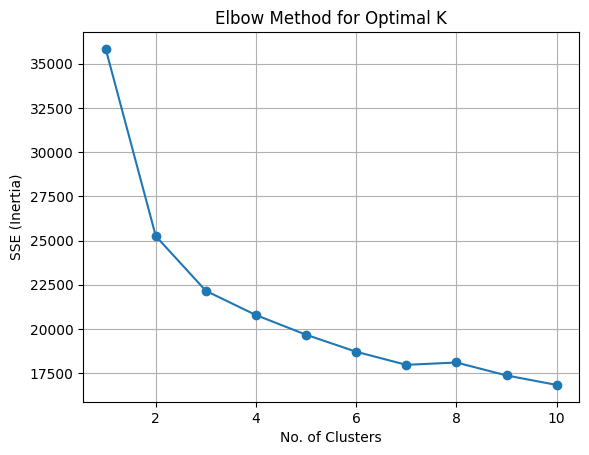

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [66]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


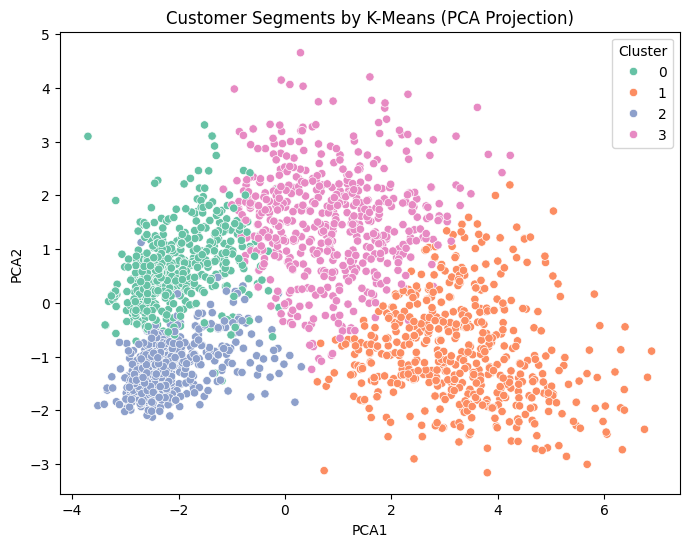

In [67]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments by K-Means (PCA Projection)')
plt.show()


In [68]:
cluster_summary = df.groupby('Cluster')[selected_features].mean().round(2)
print(cluster_summary)


           Income       Age  Recency  Kidhome  Teenhome  MntWines  MntFruits  \
Cluster                                                                        
0        41801.98 -23473.48    50.15     0.70      0.99     70.56       4.00   
1        76381.05 -23536.46    49.89     0.05      0.16    614.04      70.93   
2        29482.07 -23648.32    48.66     0.83      0.00     34.18       6.77   
3        59115.00 -23489.23    47.77     0.20      0.90    494.32      22.83   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0                  25.43             6.00              4.14         14.15   
1                 461.02           102.88             71.77         78.34   
2                  29.66             9.60              6.76         17.64   
3                 147.57            30.63             24.90         65.46   

         NumWebPurchases  NumStorePurchases  NumDealsPur

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9576\2536766867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


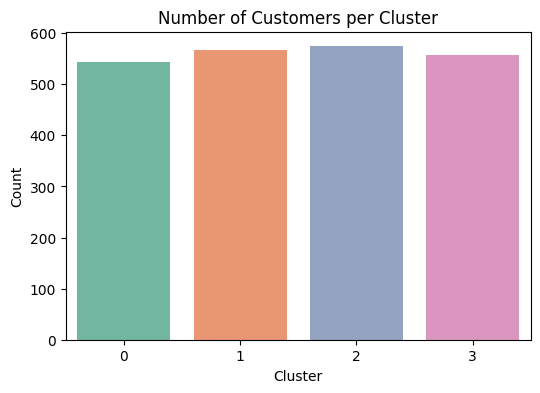

In [69]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


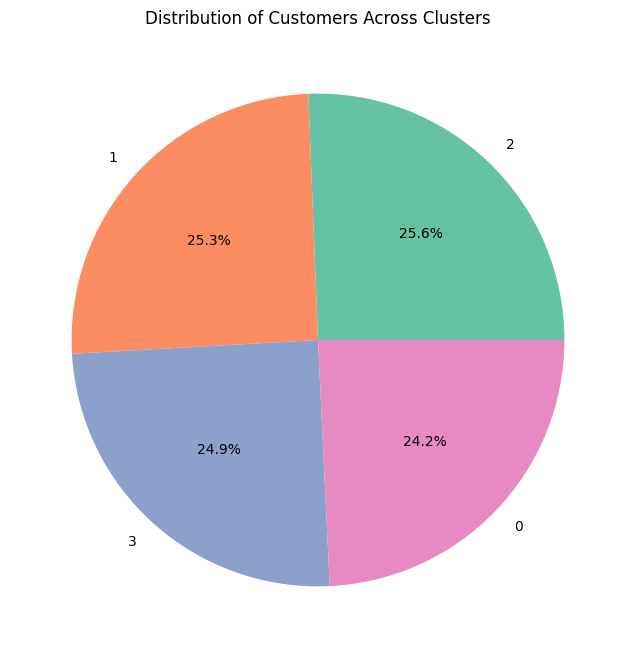

In [70]:
# Pie chart for cluster distribution
cluster_count = df['Cluster'].value_counts()
cluster_count.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette("Set2", len(cluster_count)))
plt.title('Distribution of Customers Across Clusters')
plt.ylabel('')
plt.show()


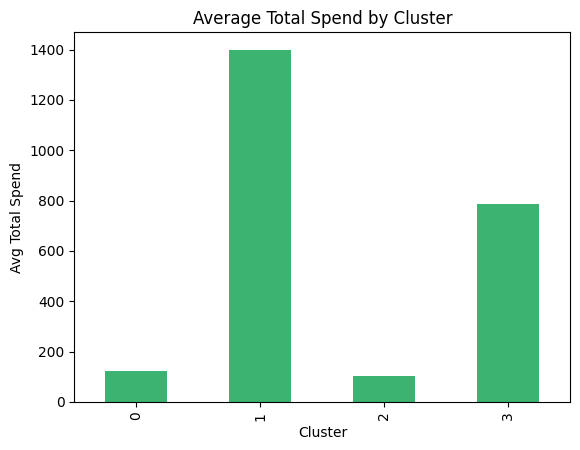

In [71]:
#Comparing average Total_Spend across clusters.
df.groupby('Cluster')['Total_Spend'].mean().plot(kind='bar', color='mediumseagreen')
plt.title("Average Total Spend by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Avg Total Spend")
plt.show()


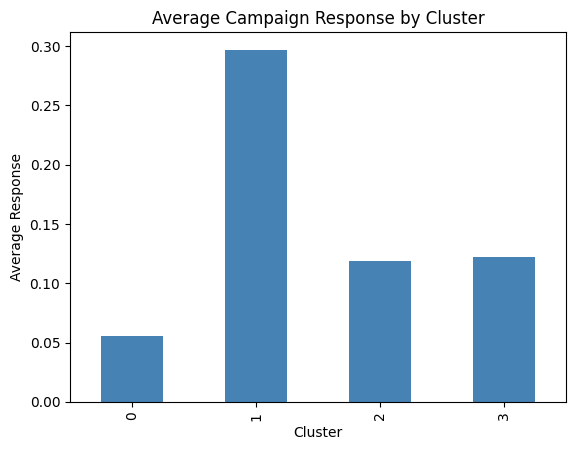

In [72]:
# which cluster has the highest response rate
df.groupby('Cluster')['Response'].mean().plot(kind='bar', color='steelblue')
plt.title("Average Campaign Response by Cluster")
plt.ylabel("Average Response")
plt.xlabel("Cluster")
plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_9576\1557665418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set3')


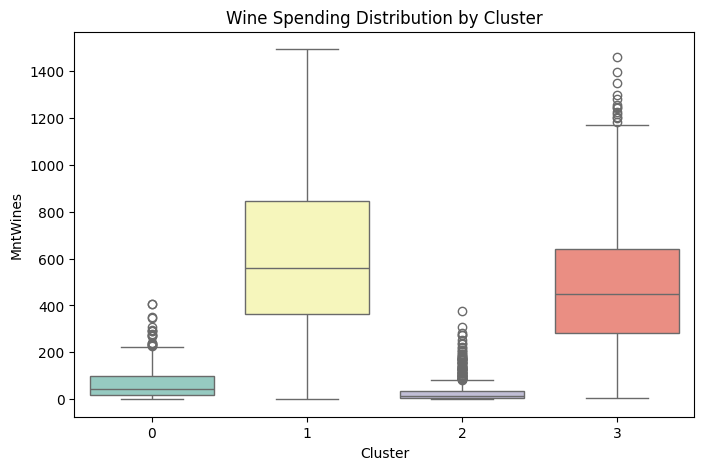

In [73]:
#Spend Behavior by Cluster for Specific Product
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set3')
plt.title("Wine Spending Distribution by Cluster")
plt.show()


In [74]:
df.to_csv("clustered_customers.csv", index=False)
